In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

Let's load in the indexing log...

In [3]:
data = pd.read_csv('c5-indexing.log', sep=' ', names=['', 'path', 'type', 'start', 'py_time', 'es_time', 'embedded', 'linked'], index_col=None, usecols=[1,2,3,4,5,6,7])
data['start'] -= data['start'][0]
data

,path,type,start,py_time,es_time,embedded,linked
0,/users/9f161054-aa2c-40b7-8239-04eb7f08b15d,user,0.000000,0.051648,1.476070,4,11
1,/analysis-step-runs/cf2bb96d-c92d-4901-911c-df...,analysis_step_run,0.023861,0.150944,1.874489,13,33
2,/a414397b-7721-4992-a667-60f9fffea0a7,analysis_step_run,0.263959,0.121530,1.663809,16,32
3,/analysis-step-runs/b5d50727-277f-45de-91c5-dc...,analysis_step_run,0.971164,0.153311,0.924831,15,30
4,/15855668-e2bc-4f12-9ebc-e8cfc233f5c6,analysis_step_run,0.976372,0.107205,0.965803,10,18
5,/20e55d03-58e5-4a13-b7dc-2838eecd328a,analysis_step_run,0.971403,0.100286,0.977690,7,22
6,/analysis-step-runs/b032bf26-97d2-4496-a28a-e9...,analysis_step_run,0.251319,0.085669,1.713753,11,19
7,/analysis-step-runs/dnanexus%3Ajob-Bz4Q66j0369...,analysis_step_run,0.122420,0.129899,1.798552,10,18
8,/analysis-step-runs/c23d7663-cab6-4f47-b655-e0...,analysis_step_run,0.000883,0.105911,2.196370,11,19
9,/analysis-step-runs/dnanexus%3Ajob-BbYgG3Q0J6Z...,analysis_step_run,0.007509,0.088887,2.242742,11,19


Remove outliers

In [4]:
trimmed_data = data[np.abs(data.py_time-data.py_time.mean())<=(3*data.py_time.std())]

And visualize the speed of embedding objects in Python, over time:

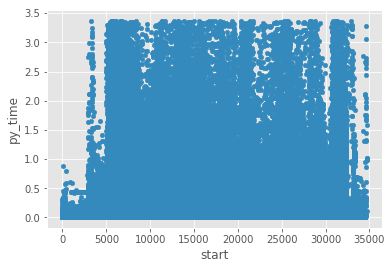

In [5]:
trimmed_data.plot(x='start', y='py_time', kind='scatter')

And also the speed of indexing in elasticsearch, over time:

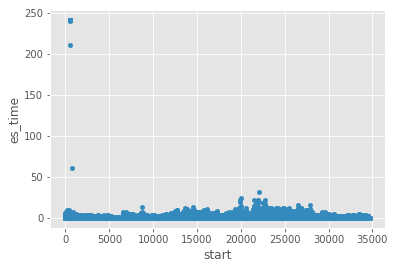

In [6]:
data.plot(x='start', y='es_time', kind='scatter')

What was the slowest single object?

In [14]:
data.iloc[data['py_time'].idxmax()]

path        /2ac0a9dd-7b76-4cac-a791-875097a95238
type                             publication_data
start                                       30605
py_time                                   514.879
es_time                                   1.41388
embedded                                     9893
linked                                      10167
Name: 809360, dtype: object

What are the 10 slowest?

In [25]:
data.sort_values('py_time',ascending=False)[0:20]

,path,type,start,py_time,es_time,embedded,linked
809360,/2ac0a9dd-7b76-4cac-a791-875097a95238,publication_data,30604.975514,514.879426,1.413880,9893,10167
809404,/4595a1f8-2def-42f1-b10e-405395cba727,publication,30745.671902,377.643310,0.564970,9885,10157
173423,/79d7cc8f-aa55-4da8-8058-d26500b43616,annotation,3351.264985,268.813679,0.285309,9958,7474
804717,/PMID%3A26907613,publication,30690.970679,223.104671,0.097556,6071,6321
439805,/ENCFF052OLC,file,12671.221343,153.665845,1.353587,8462,4992
358386,/4be20263-75d6-423c-81d7-c555bbad14d2,file,9809.490577,116.105882,0.628402,8458,4980
823879,/6af428e6-edb0-458e-be79-7682b492d2ee,project,31588.471852,70.248526,2.047351,6625,6827
829798,/209eefb0-5b64-4a85-a439-40457fd0b13c,project,31792.332222,66.275800,1.274500,6373,6438
827733,/794aac80-335a-4c2d-acba-1efe079ef4d0,project,31730.010433,60.265507,2.056205,6647,6721
721854,/ENCFF510VPW,file,28076.613288,56.866406,0.515250,156,184


What about the average time and count of embedded/linked objects by type?

In [26]:
grouped = data.groupby(['type'])['py_time', 'es_time', 'embedded', 'linked'].median().sort_values('py_time')
grouped['count'] = data.groupby('type').size()
grouped

,py_time,es_time,embedded,linked,count
type,,,,,
software_version,0.002082,0.217134,8.0,11.0,287
analysis_step_run,0.005391,0.169768,10.0,18.0,151229
treatment,0.005439,0.052860,5.0,10.0,264
publication,0.005775,0.219388,4.0,6.0,3215
document,0.005814,0.293009,7.0,10.0,11012
organism,0.006305,0.249537,1.0,1.0,28
source,0.006365,0.216386,1.0,1.0,289
target,0.006940,0.229724,2.0,2.0,9565
donor_characterization,0.007110,0.212770,8.0,15.0,238


Which types did we spend the most time indexing?

In [9]:
totals = data.groupby('type')['py_time'].sum().sort_values()
totals

type
organism                                 0.263387
platform                                 0.355901
cpg_correlation_quality_metric           0.438380
software_version                         0.631870
mouse_donor                              1.043851
award                                    1.343786
donor_characterization                   1.943016
treatment                                1.946186
source                                   2.252044
page                                     2.548756
lab                                      3.561360
image                                    3.648555
analysis_step_version                    3.714610
software                                 4.074283
ucsc_browser_composite                   4.130184
replication_timing_series                7.377194
pipeline                                 9.210524
analysis_step                            9.813344
worm_donor                              12.990229
reference                               13.66

In [27]:
grouped['total'] = totals
grouped['pct'] = totals / totals.sum() * 100
grouped.sort_values('pct')

,py_time,es_time,embedded,linked,count,total,pct
type,,,,,,,
organism,0.006305,0.249537,1.0,1.0,28,0.263387,0.000163
platform,0.007862,0.076760,2.0,3.0,41,0.355901,0.000220
cpg_correlation_quality_metric,0.046508,0.220447,25.0,22.0,9,0.438380,0.000272
software_version,0.002082,0.217134,8.0,11.0,287,0.631870,0.000391
mouse_donor,0.009276,0.223275,6.0,11.0,87,1.043851,0.000646
award,0.013124,0.166247,4.0,5.0,95,1.343786,0.000832
donor_characterization,0.007110,0.212770,8.0,15.0,238,1.943016,0.001203
treatment,0.005439,0.052860,5.0,10.0,264,1.946186,0.001205
source,0.006365,0.216386,1.0,1.0,289,2.252044,0.001395


How does the Python indexing time scale with # of embedded objects?

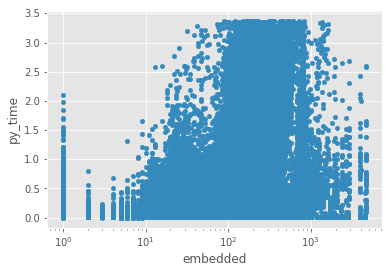

In [28]:
trimmed_data.plot(x='embedded', y='py_time', kind='scatter', logx=True)

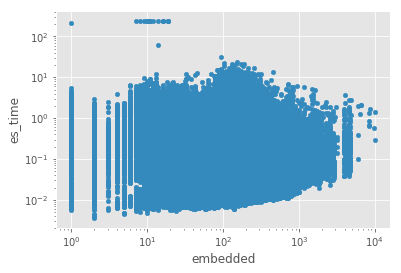

In [29]:
data.plot(x='embedded', y='es_time', kind='scatter', logx=True, logy=True)

In [31]:
grouped.to_excel('indexing_stats_by_type.xls')